In [1]:
import sys
print(sys.executable)

from keras.layers import Input, Dense
from keras.models import Model

/home/shubham/anaconda3/envs/annotation_venv/bin/python


Using TensorFlow backend.


In [2]:
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [3]:
encoder = Model(input_img, encoded)

In [4]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np

(x_train, _),(x_test, _) = mnist.load_data()

In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
               epochs = 50,
               batch_size = 256,
               shuffle = True,
               validation_data = (x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.3849 - val_loss: 0.2733
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 0.2667 - val_loss: 0.2568
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.2469 - val_loss: 0.2345
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.2269 - val_loss: 0.2169
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.2114 - val_loss: 0.2033
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.1992 - val_loss: 0.1925
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.1898 - val_loss: 0.1842
Epoch 8/50
60000/60000 [==============================] - 4s - loss: 0.1824 - val_loss: 0.1777
Epoch 9/50
60000/60000 [==============================] - 4s - loss: 0.1764 - val_loss: 0.1723
Epoch 10/50
60000/60000 [==============================] - 4s - loss: 0.1713 - val_loss: 0.1675

In [17]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

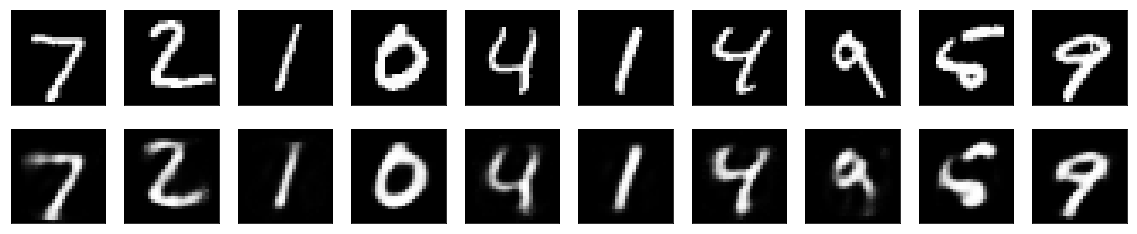

In [18]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## Deep autoencoder

In [14]:
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [15]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 10s - loss: 0.3619 - val_loss: 0.2639
Epoch 2/100
60000/60000 [==============================] - 6s - loss: 0.2587 - val_loss: 0.2511
Epoch 3/100
60000/60000 [==============================] - 6s - loss: 0.2411 - val_loss: 0.2306
Epoch 4/100
60000/60000 [==============================] - 6s - loss: 0.2223 - val_loss: 0.2096
Epoch 5/100
60000/60000 [==============================] - 6s - loss: 0.2039 - val_loss: 0.1974
Epoch 6/100
60000/60000 [==============================] - 8s - loss: 0.1946 - val_loss: 0.1888
Epoch 7/100
60000/60000 [==============================] - 6s - loss: 0.1877 - val_loss: 0.1841
Epoch 8/100
60000/60000 [==============================] - 9s - loss: 0.1806 - val_loss: 0.1764
Epoch 9/100
60000/60000 [==============================] - 8s - loss: 0.1735 - val_loss: 0.1707
Epoch 10/100
60000/60000 [==============================] - 8s - loss: 0.1682 - val_l

60000/60000 [==============================] - 6s - loss: 0.1030 - val_loss: 0.1015
Epoch 86/100
60000/60000 [==============================] - 6s - loss: 0.1028 - val_loss: 0.1012
Epoch 87/100
60000/60000 [==============================] - 6s - loss: 0.1026 - val_loss: 0.1012
Epoch 88/100
60000/60000 [==============================] - 6s - loss: 0.1024 - val_loss: 0.1024
Epoch 89/100
60000/60000 [==============================] - 6s - loss: 0.1023 - val_loss: 0.1013
Epoch 90/100
60000/60000 [==============================] - 6s - loss: 0.1021 - val_loss: 0.1017
Epoch 91/100
60000/60000 [==============================] - 6s - loss: 0.1020 - val_loss: 0.1010
Epoch 92/100
60000/60000 [==============================] - 8s - loss: 0.1019 - val_loss: 0.1009
Epoch 93/100
60000/60000 [==============================] - 10s - loss: 0.1016 - val_loss: 0.1016
Epoch 94/100
60000/60000 [==============================] - 6s - loss: 0.1014 - val_loss: 0.0999
Epoch 95/100
60000/60000 [================